# 4. Functions and Classes: Exercise Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Functions
Define the following functions and show some sample outputs.  
1) Factorial of n: $1 \times 2 \times \cdots \times n$.

In [2]:
def factorial(n):
    """factorial of n"""
    f = 1
    for i in range(n):
        f = f * (i+1)
    return f

In [3]:
def factorial(n:int):
    """factorial of n"""
    if n < 0 or type(n)!=int:
        print('n should be non-negative integer.')
        return
    elif n==0:
        return 1
    else:
        return factorial(n-1)*n

In [4]:
factorial(-1)

n should be non-negative integer.


In [5]:
for n in range(10):
    print(factorial(n))

1
1
2
6
24
120
720
5040
40320
362880


2) For a circle of radius r (default r=1), given x coordinate, return possible y coordinates (i.e., both positive and negative).

In [6]:
def circley(x, r=1):
    """y coordinate for given x for a circle of radius r"""
    if abs(x) > r:
        return
    elif abs(x) == r:
        return 0.
    else:
        y = np.sqrt(r**2 - x**2)
        return y, -y

In [7]:
X = np.linspace(-1.2, 1.2, 13)
for x in X:
    print(circley(x))

None
0.0
(0.5999999999999999, -0.5999999999999999)
(0.8, -0.8)
(0.916515138991168, -0.916515138991168)
(0.9797958971132712, -0.9797958971132712)
(1.0, -1.0)
(0.9797958971132712, -0.9797958971132712)
(0.9165151389911681, -0.9165151389911681)
(0.8, -0.8)
(0.6000000000000003, -0.6000000000000003)
(2.1073424255447017e-08, -2.1073424255447017e-08)
None


In [8]:
for i in range(-6, 7):
    print(circley(0.2*i))

None
0.0
(0.5999999999999999, -0.5999999999999999)
(0.7999999999999999, -0.7999999999999999)
(0.916515138991168, -0.916515138991168)
(0.9797958971132712, -0.9797958971132712)
(1.0, -1.0)
(0.9797958971132712, -0.9797958971132712)
(0.916515138991168, -0.916515138991168)
(0.7999999999999999, -0.7999999999999999)
(0.5999999999999999, -0.5999999999999999)
0.0
None


3) Draw a star-like shape with n vertices, every m-th vertices connected, with default of n=5 and m=2.

In [9]:
def star(n=5, m=(n-1)//2, r=1):
    """Draw a star with n>=5 vertices."""
    if n < 3:
        print('n should be 3 or more.')
        return
    if m == None:
        m = (n-1)//2
    xy = np.zeros((n+1, 2))
    th = 2*np.pi*m/n
    for i in range(n):
        xy[i] = [r*np.sin(i*th), r*np.cos(i*th)]
    xy[-1] = xy[0]
    plt.plot(xy[:,0], xy[:,1])
    plt.axis('square')
    plt.axis('off')

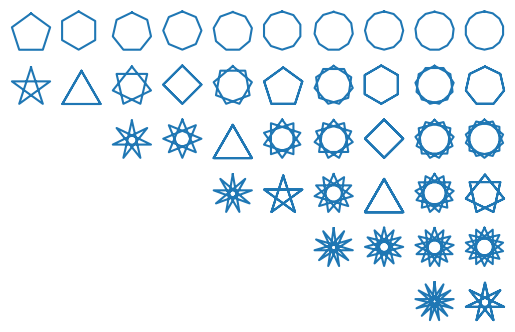

In [10]:
N = 10
M = 7
for n in range(5, 5+N):
    for m in range(1, min((n+1)//2, M)):
        plt.subplot(M, N, (m-1)*N + n-4)
        star(n, m)

4) Any function of your interest

## 2. Classes
1) Extend the `Cell`, `gCell` or `Culture` class with new methods, such as:
* cells with other shapes, e.g. ellipse, polygon,...
* move to avoid overlap with another cell
* connect with another cell like a neuron
* growth based on the environment, e.g., number of neighbors
* ...

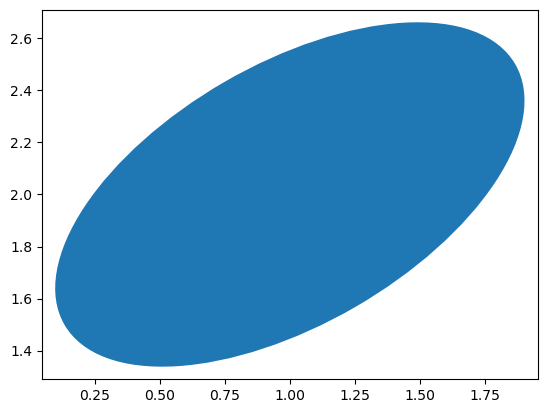

In [11]:
# example of drawing an ellipse
import matplotlib.patches as pat
p = pat.Ellipse(xy=(1,2), width=2, height=1, angle=30)
plt.gca().add_patch(p)
plt.axis('equal');

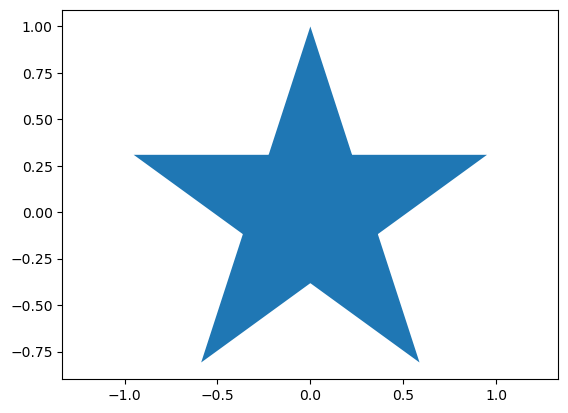

In [12]:
# example of drawing a polygon
xy = np.array([[np.sin(th),np.cos(th)] for th in np.arange(0, 4*np.pi, np.pi*4/5)])
p = pat.Polygon(xy)
plt.gca().add_patch(p)
plt.axis('equal');

In [13]:
class Cell:
    """Class for a cell"""

    def __init__(self, position = [0,0], radius=0.1, color=[1,0,0,0.5]):
        """Make a new cell"""
        self.position = np.array(position)
        self.radius = radius
        self.color = color
     
    def show(self):
        """Visualize as a circule"""
        c = plt.Circle(self.position,self.radius,color=self.color)
        plt.gca().add_patch(c)
        plt.axis('equal')

In [14]:
class Neuron(Cell):
    """Neuron class based on Cell class"""
    
    def __init__(self, position=[0,0], radius=0.2, color=[1,0,0,0.5]):
        """Create a neuron"""
        super().__init__(position=position, radius=radius, color=color)  # call the constructor of Cell class
        self.naxon = 0  # number of axons
        self.axon = []  # base and termian positions of axons
    
    def connect(self, target):
        """Connect axon to a target neuron"""
        vec = target.position - self.position  # vector to the target center
        vec = vec/np.sqrt(sum(vec**2))  # normalize to length 1
        base = self.position + self.radius*vec  # base of the axon
        term = target.position - target.radius*vec  # synaptic terminal
        self.axon.append(np.array([base,term]))
        self.naxon += 1   # increment the axon number
    
    def show(self):
        """show the neuron with axons"""
        super().show()  # show the cell body
        for i in range(self.naxon):
            plt.plot(self.axon[i][:,0], self.axon[i][:,1], c=self.color)  # axon
            plt.plot(self.axon[i][-1,0], self.axon[i][-1,1], 'o', c=self.color)  # synaptic terminal

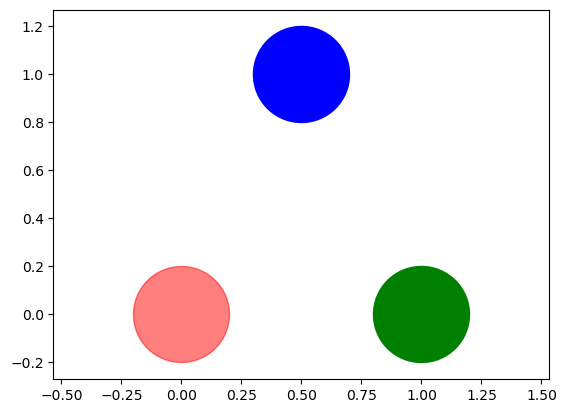

In [15]:
# Neurons with no connections
n1 = Neuron()
n2 = Neuron([1,0], color='g')
n3 = Neuron([0.5,1], color='b')
n1.show(); n2.show(); n3.show();

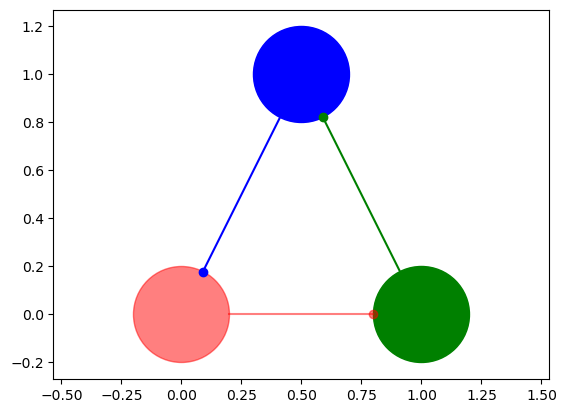

In [16]:
# Triangular connections
n1.connect(n2)
n2.connect(n3)
n3.connect(n1)
n1.show(); n2.show(); n3.show();

2) Save the defined class(es) as a module `cell.py`.

3) Import the module and test how it works.

In [17]:
import cell

In [18]:
import importlib

In [19]:
importlib.reload(cell) # This is needed after updating a module

<module 'cell' from '/Users/doya/OIST Dropbox/kenji doya/Python/iSciComp/cell.py'>

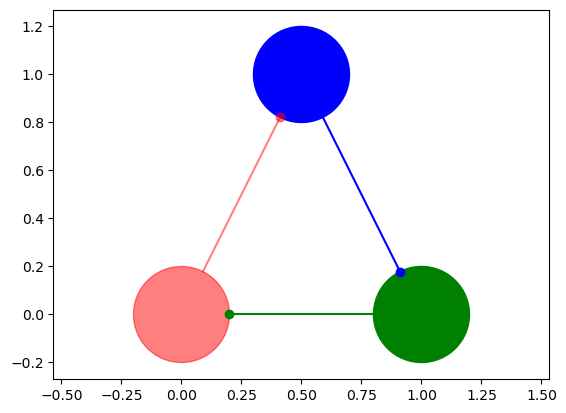

In [20]:
# Neurons with no connections
n1 = cell.Neuron()
n2 = cell.Neuron([1,0], color='g')
n3 = cell.Neuron([0.5,1], color='b')
# Triangular connections
n1.connect(n3)
n2.connect(n1)
n3.connect(n2)
n1.show(); n2.show(); n3.show();